In [13]:
import csv
from pandas import read_csv

filename = "RandomForest_deci.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_deci = next(reader)

df_deci = read_csv('RandomForest_deci.csv', header=None)

filename = "RandomForest_deci_shuffled.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_deci_shuffled = next(reader)

filename = "RandomForest_resp.csv"

with open(filename, "r") as file:
    reader = csv.reader(file)
    rf_resp = next(reader)



In [64]:
import pandas as pd
import ast
import numpy as np

def parse_matrix(element):
    element = element.strip('[]').strip()
    if not element:
        return []
    values = [float(x.strip()) for x in element.split(',') if x.strip()]
    return values

converter = {i: parse_matrix for i in range(0, 2875)}

df_deci = pd.read_csv("RandomForest_deci.csv", converters=converter, header=None)
df_deci = df_deci[0][0]
df_deci_shuffled = pd.read_csv("RandomForest_deci_shuffled.csv", converters=converter, header=None)
df_deci_shuffled = df_deci_shuffled[0][0]
df_resp = pd.read_csv("RandomForest_resp.csv", converters=converter, header=None)
df_resp = df_resp[0][0]

In [51]:
print(np.shape(df_deci))

(2876,)


In [56]:
'''cell only for reading time labels'''
from toolbox.methods import train_main_ori, read_data

all_epochs, all_rawdata = read_data(amount_of_subjects=1,
                        task='main',
                        resample=False,
                        resample_frequency=20
                        )
time_labels = all_epochs[0].times

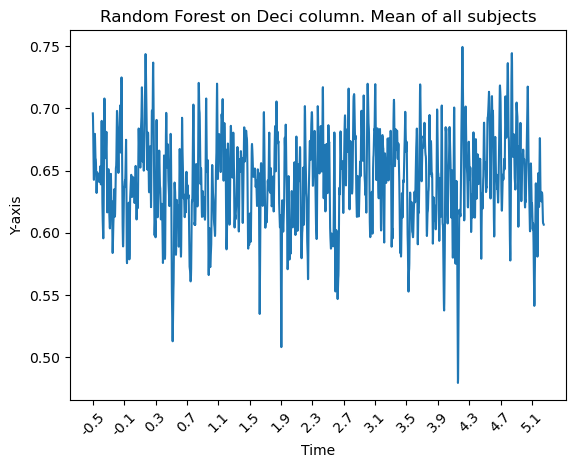

In [65]:
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

df_filtered = scipy.ndimage.gaussian_filter(df_deci, sigma=2)
x_indices = np.arange(len(df_filtered))
step = 200
selected_indices = x_indices[::step]
selected_labels = time_labels[::step]

plt.plot(x_indices, df_filtered)
plt.xticks(selected_indices, selected_labels)

plt.xlabel('Time')
plt.ylabel('Y-axis')
plt.title('Random Forest on DECI column. Mean of all subjects')

plt.xticks(rotation=45)

plt.show()

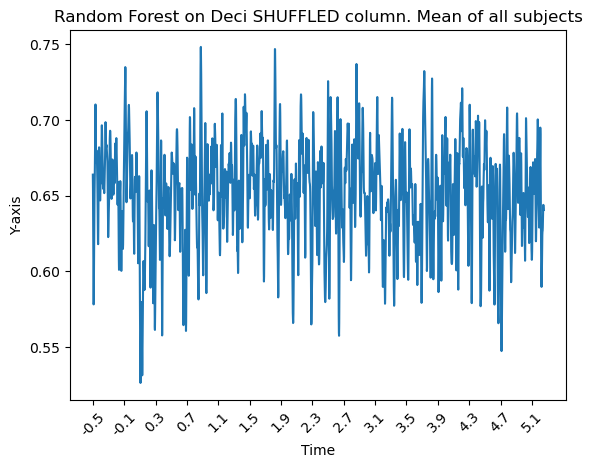

In [66]:
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

df_filtered = scipy.ndimage.gaussian_filter(df_deci_shuffled, sigma=2)
x_indices = np.arange(len(df_filtered))
step = 200
selected_indices = x_indices[::step]
selected_labels = time_labels[::step]

plt.plot(x_indices, df_filtered)
plt.xticks(selected_indices, selected_labels)

plt.xlabel('Time')
plt.ylabel('Y-axis')
plt.title('Random Forest on Deci SHUFFLED column. Mean of all subjects')

plt.xticks(rotation=45)

plt.show()

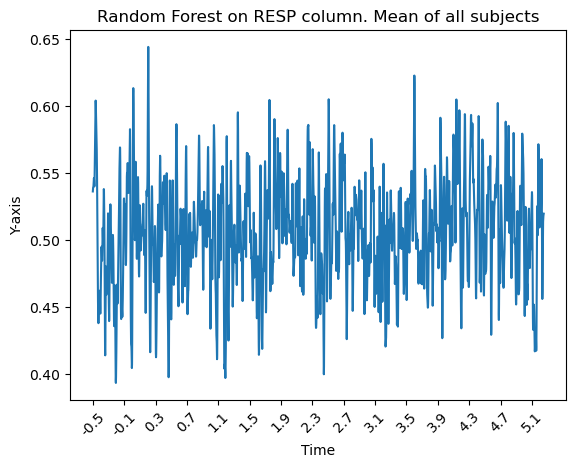

In [67]:
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

df_filtered = scipy.ndimage.gaussian_filter(df_resp, sigma=2)
x_indices = np.arange(len(df_filtered))
step = 200
selected_indices = x_indices[::step]
selected_labels = time_labels[::step]

plt.plot(x_indices, df_filtered)
plt.xticks(selected_indices, selected_labels)

plt.xlabel('Time')
plt.ylabel('Y-axis')
plt.title('Random Forest on RESP column. Mean of all subjects')

plt.xticks(rotation=45)

plt.show()